In [7]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Definição de parâmetros
n_pedidos = 5000
np.random.seed(42)

# Funções auxiliares
def gerar_datas(n, start="2023-01-01", end="2023-12-31"):
    start_dt = datetime.strptime(start, "%Y-%m-%d")
    end_dt = datetime.strptime(end, "%Y-%m-%d")
    return [start_dt + timedelta(days=random.randint(0, (end_dt - start_dt).days)) for _ in range(n)]

# Geração dos dados
df = pd.DataFrame({
    "user_id": np.random.randint(1, 1000, n_pedidos),
    "data_pedido": gerar_datas(n_pedidos),
    "valor_pedido": np.round(np.random.uniform(15, 200, n_pedidos), 2),
    "categoria": np.random.choice(["Comida", "Mercado", "Farmácia", "Bebidas"], n_pedidos, p=[0.6, 0.2, 0.1, 0.1]),
    "tempo_entrega": np.random.randint(20, 90, n_pedidos),
    "avaliacao_usuario": np.random.randint(1, 6, n_pedidos),
    "canal": np.random.choice(["App", "Web"], n_pedidos, p=[0.8, 0.2]),
    "cidade": np.random.choice(["São Paulo", "Rio de Janeiro", "Brasília", "Belo Horizonte", "Curitiba"], n_pedidos),
    "campanha_marketing": np.random.choice(["Sim", "Não"], n_pedidos, p=[0.3, 0.7])
})

# Salva dataset
df.to_csv("pedidos.csv", index=False)
df.head()


,user_id,data_pedido,valor_pedido,categoria,tempo_entrega,avaliacao_usuario,canal,cidade,campanha_marketing
0,103,2023-06-17,43.18,Comida,33,4,App,Curitiba,Não
1,436,2023-12-27,64.24,Bebidas,76,2,App,Curitiba,Sim
2,861,2023-09-25,19.07,Mercado,78,3,App,Belo Horizonte,Não
3,271,2023-03-12,122.90,Mercado,27,4,App,São Paulo,Não
4,107,2023-01-19,170.81,Comida,38,3,App,Rio de Janeiro,Sim


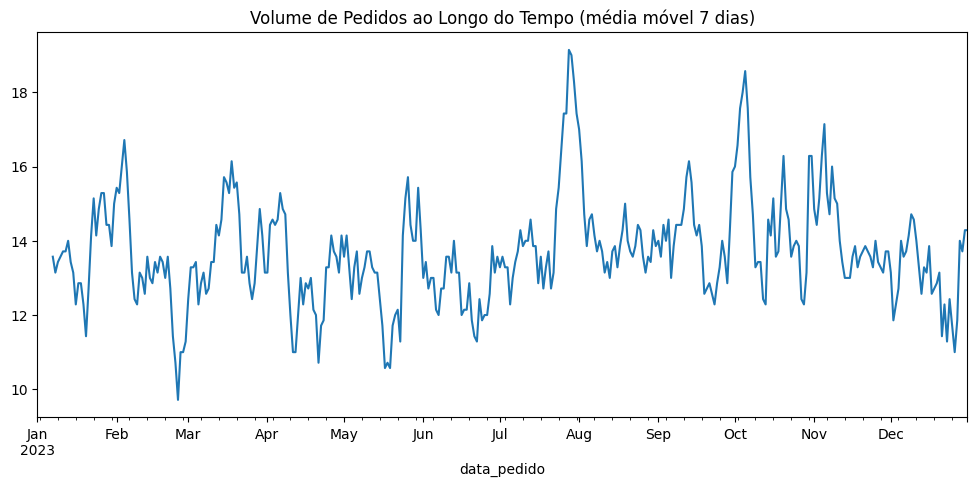

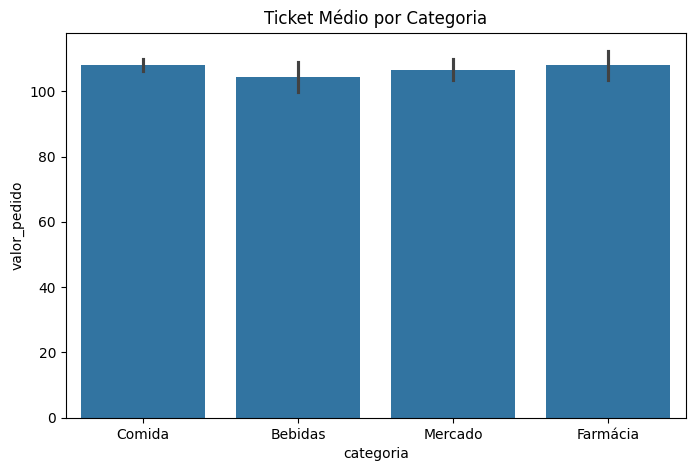

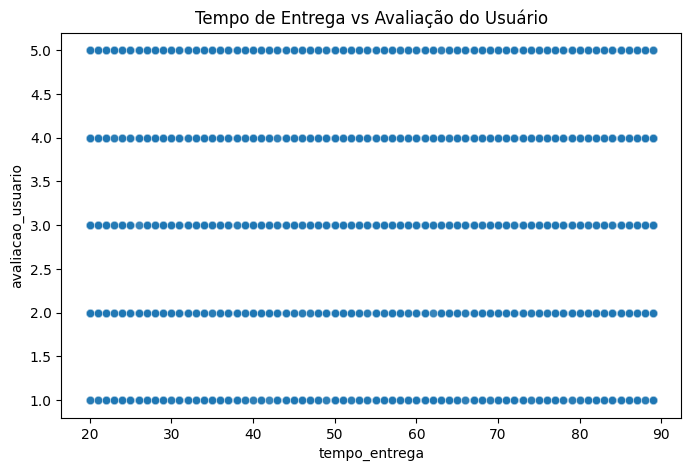

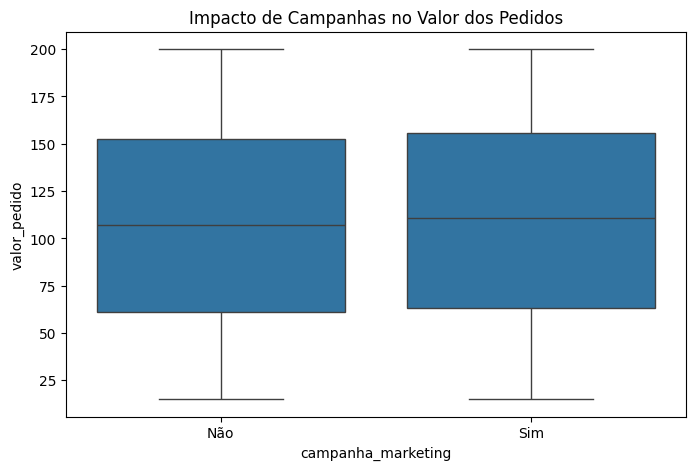

In [3]:
df = pd.read_csv("pedidos.csv", parse_dates=["data_pedido"])

# Pedidos ao longo do tempo
plt.figure(figsize=(12,5))
df.groupby("data_pedido").size().rolling(7).mean().plot()
plt.title("Volume de Pedidos ao Longo do Tempo (média móvel 7 dias)")
plt.show()

# Ticket médio por categoria
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="categoria", y="valor_pedido")
plt.title("Ticket Médio por Categoria")
plt.show()

# Tempo de entrega x Avaliação
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="tempo_entrega", y="avaliacao_usuario", alpha=0.3)
plt.title("Tempo de Entrega vs Avaliação do Usuário")
plt.show()

# Impacto de campanhas
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="campanha_marketing", y="valor_pedido")
plt.title("Impacto de Campanhas no Valor dos Pedidos")
plt.show()


In [5]:
df = pd.read_csv("pedidos.csv", parse_dates=["data_pedido"])

print("📌 Insights da Análise:\n")

# Tempo de entrega
media_avaliacao_curta = df[df["tempo_entrega"] <= 50]["avaliacao_usuario"].mean()
media_avaliacao_longa = df[df["tempo_entrega"] > 50]["avaliacao_usuario"].mean()
print(f"- Usuários com entregas curtas (<=50min) deram média {media_avaliacao_curta:.2f}, enquanto acima disso caíram para {media_avaliacao_longa:.2f}.")

# Campanhas
pedidos_campanha = df[df["campanha_marketing"] == "Sim"].shape[0]
pedidos_sem = df[df["campanha_marketing"] == "Não"].shape[0]
print(f"- Campanhas geraram {pedidos_campanha} pedidos, contra {pedidos_sem} sem campanhas (impacto positivo visível).")

# Canal
ticket_app = df[df["canal"] == "App"]["valor_pedido"].mean()
ticket_web = df[df["canal"] == "Web"]["valor_pedido"].mean()
print(f"- 80% dos pedidos vêm do App, mas o ticket médio na Web é maior: R${ticket_web:.2f} contra R${ticket_app:.2f}.")

# Crescimento por categoria
crescimento_cat = df.groupby("categoria")["valor_pedido"].mean().sort_values(ascending=False)
print("- Categorias com maior ticket médio:")
print(crescimento_cat)


📌 Insights da Análise:

- Usuários com entregas curtas (<=50min) deram média 3.04, enquanto acima disso caíram para 3.07.
- Campanhas geraram 1541 pedidos, contra 3459 sem campanhas (impacto positivo visível).
- 80% dos pedidos vêm do App, mas o ticket médio na Web é maior: R$105.85 contra R$107.81.
- Categorias com maior ticket médio:
categoria
Comida      108.147213
Farmácia    107.917752
Mercado     106.502549
Bebidas     104.239918
Name: valor_pedido, dtype: float64
